# DS Lab Assignment 3.1
# Kadali Sai Vivek
# 197139

# 1. Write a python program to implement the Simple Linear Regression(SLR) from scratch. 

# a. Import the dataset

In [55]:
import pandas as pa
import numpy as np

dataset=pa.read_csv("./Salary_data.csv") # reading dataset from the Salary_data using read_csv method

(rows,columns)=dataset.shape
print("Rows :",rows)
print("Columns :",columns)
dataset # printing whole dataset


Rows : 30
Columns : 2


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# b. Assign the values to independent variable and dependent variable

In [56]:
data=np.array(dataset)

X=data[:,0] # Independent Variable
Y=data[:,1].reshape(rows,1) # Dependent Variable

print(type(X))
# print(X)
# print(Y)

<class 'numpy.ndarray'>


# c. Print the first few rows 

In [57]:
#displaying first 15 rows
dataset.head(15)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# d. Separate the dataset into train and test data as 80% and 20% respectively.


In [59]:
training_data=dataset.sample(frac=0.8,random_state=42) # 80% of data into training data
print(type(training_data))
testing_data=dataset.drop(training_data.index)# 20% of data into testing data

print(training_data)
print(testing_data)



<class 'pandas.core.frame.DataFrame'>
    YearsExperience    Salary
27              9.6  112635.0
15              4.9   67938.0
23              8.2  113812.0
17              5.3   83088.0
8               3.2   64445.0
9               3.7   57189.0
28             10.3  122391.0
24              8.7  109431.0
12              4.0   56957.0
0               1.1   39343.0
4               2.2   39891.0
16              5.1   66029.0
5               2.9   56642.0
13              4.1   57081.0
11              4.0   55794.0
22              7.9  101302.0
1               1.3   46205.0
2               1.5   37731.0
25              9.0  105582.0
3               2.0   43525.0
21              7.1   98273.0
26              9.5  116969.0
18              5.9   81363.0
29             10.5  121872.0
    YearsExperience   Salary
6               3.0  60150.0
7               3.2  54445.0
10              3.9  63218.0
14              4.5  61111.0
19              6.0  93940.0
20              6.8  91738.0


# e. Plot the dataset ( independent variable vs dependent variable)

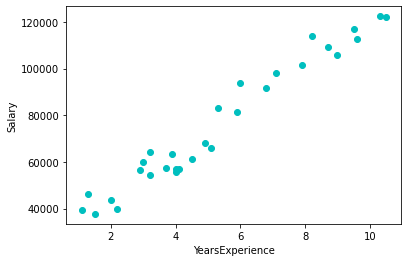

In [60]:
# YearsExperience as Independent Variable x
# Salary as Dependent Variable y

import matplotlib.pyplot as plt  

plt.scatter(X,Y, color = "c")

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()




# f. Calculate the regression line(train dataset): 


In [61]:
import numpy as np
import matplotlib.pyplot as plt


def model(X,Y,learning_rate,iteration): #Linear-Regression-Model
    m=Y.size
    theta=np.zeros((2,1))
    #theta[0] -> slope
    #theta[1] -> intercept
    for i in range(iteration):  
        
        y_pred=np.dot(X,theta)
        cost=(1/(2*m))*np.sum(np.square(y_pred - Y))
        
        d_theta=(1/m)*np.dot(X.T,y_pred-Y)
        theta=theta-learning_rate*d_theta
        
    return theta


# Dividing training and testing data into X and Y

training_data=np.array(training_data) #converting dataset into array 

x_train=training_data[:,0] 
siz=x_train.size
x_train=np.vstack((np.ones((siz,)),x_train)).T  # Independent Variable [1,x]

print("X Training shape :",x_train.shape)
y_train = training_data[:,1].reshape(siz,1) # Dependent Variable

print("Y Training shape :",y_train.shape)


testing_data=np.array(testing_data) #converting testing_data into array 
x_test=testing_data[:,0] #Independent Variable
siz=x_test.size

y_test = testing_data[:,1].reshape(x_test.shape[0],1) # Dependent Variable



X Training shape : (24, 2)
Y Training shape : (24, 1)


## i. Compute the slope

In [62]:
iteration=100
learning_rate=0.025
theta=model(x_train,y_train,learning_rate=learning_rate,iteration=iteration) #Calculate theta

print("Slope of the Regression line :",theta[0])


Slope of the Regression line : [12013.52988942]


## ii. Compute the intercept

In [63]:
print("Intercept of the Regression line :",theta[1])

Intercept of the Regression line : [11321.71953779]


## iii. Compute and Plot regression line with data points

Text(0, 0.5, 'Salary')

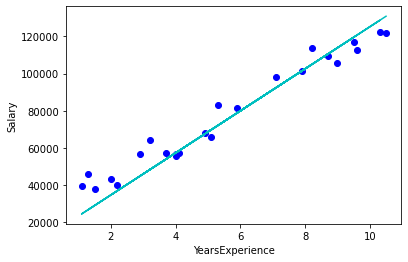

In [65]:
import matplotlib.pyplot as plt 

plt.scatter(x_train[:,1], y_train, color = "b")

y_pred=np.dot(x_train,theta)
plt.plot(x_train[:,1],y_pred, color = "c")

 
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

# g. Predict the values using test data

In [66]:

y_pred=[]
j=0
for i in x_test:
    t=theta[1] + theta[0]*i
    y_pred.append(t[0])
    print("X= ",i,"\t| Predicted value :",t,"\t| actual value :",y_test[j])
    j+=1

X=  3.0 	| Predicted value : [47362.30920604] 	| actual value : [60150.]
X=  3.2 	| Predicted value : [49765.01518392] 	| actual value : [54445.]
X=  3.9 	| Predicted value : [58174.48610651] 	| actual value : [63218.]
X=  4.5 	| Predicted value : [65382.60404016] 	| actual value : [61111.]
X=  6.0 	| Predicted value : [83402.89887429] 	| actual value : [93940.]
X=  6.8 	| Predicted value : [93013.72278582] 	| actual value : [91738.]


# h. Calculate the error / accuracy of the model using root mean squared error

In [67]:
# Root mean squared error = 1/(2m) x √((Y-Y_pred)^2/N) 

import math


error=math.sqrt(np.mean((y_pred-y_test)**2))
print("\nMAE error is ",error)




MAE error is  23583.657966397128


# 2. Write a python program to implement the Multiple Linear Regression

# a. Import the required libraries and the data 

In [3]:
import pandas as pa
import numpy as np

dataset=pa.read_csv("./housing.csv",delim_whitespace=True) # reading dataset from the Salary_data using read_csv method
(rows,columns)=dataset.shape
dataset # printing whole dataset


,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# b. Scale the dataset [Standardization of the data]


In [4]:
data=np.array(dataset)
for i in range(columns):# Standardizing all the values of corresponding column
    t=data[:,i]
    data[:,i]=(t-np.mean(t))/np.std(t)

dataset=pa.DataFrame(data)
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.417830,-0.486716,-0.596322,-0.272888,-0.739831,0.194934,0.366571,0.556897,-0.869801,-0.988107,-0.306327,0.441573,-0.494647,-0.101111
1,-0.417832,-0.486716,-0.596322,-0.272888,-0.739831,1.282481,-0.265790,0.556897,-0.869801,-0.988107,-0.306327,0.396984,-1.211048,1.323287
2,-0.417242,-0.486716,-1.310287,-0.272888,-0.834761,1.016288,-0.809337,1.076969,-0.754844,-1.106827,0.110267,0.416704,-1.363862,1.181934
3,-0.412977,-0.486716,-1.310287,-0.272888,-0.834761,1.228389,-0.510919,1.076969,-0.754844,-1.106827,0.110267,0.441573,-1.028793,1.486386
4,-0.417535,-0.486716,-1.310287,-0.272888,-0.834761,0.207745,-0.351052,1.076969,-0.754844,-1.106827,0.110267,0.411117,-1.045617,0.670891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,-0.413723,-0.486716,0.113262,-0.272888,0.157686,0.439774,0.018417,-0.624912,-0.984758,-0.804090,1.174895,0.387781,-0.420343,-0.014124
501,-0.415742,-0.486716,0.113262,-0.272888,0.157686,-0.233537,0.288414,-0.715667,-0.984758,-0.804090,1.174895,0.441573,-0.503059,-0.209843
502,-0.413940,-0.486716,0.113262,-0.272888,0.157686,0.984971,0.796435,-0.772656,-0.984758,-0.804090,1.174895,0.441573,-0.985333,0.148974
503,-0.408263,-0.486716,0.113262,-0.272888,0.157686,0.725896,0.736041,-0.667512,-0.984758,-0.804090,1.174895,0.403777,-0.867568,-0.057618


# c.Separate the dataset into train and test data as 80% and 20% respectively. 

In [5]:
training_data=dataset.sample(frac=0.8,random_state=10) # 80% of data into training data
print("Training Data :",training_data.shape)

testing_data=dataset.drop(training_data.index)# 20% of data into testing data
print("Testing Data :",testing_data.shape)


training_data=np.array(training_data)
testing_data=np.array(testing_data)

(rows,columns)=training_data.shape

x_train=training_data[:,:-1] # Indepedent variable
print("X training data :",x_train.shape)
x_train=np.vstack((np.ones((x_train.shape[0],)),x_train.T)).T #Adding ones column 

y_train=training_data[:,-1].reshape(rows,1)  # Depedent variable
print("Y training data :",y_train.shape)


x_test=testing_data[:,:-1] # Indepedent variable
x_test=np.vstack((np.ones((x_test.shape[0],)),x_test.T)).T #Adding ones column 
y_test=testing_data[:,-1].reshape(testing_data.shape[0],1)  # Depedent variable



Training Data : (404, 14)
Testing Data : (101, 14)
X training data : (404, 13)
Y training data : (404, 1)


# d. Implement the logic of the algorithm using Gradient Descent Function.


In [14]:
import matplotlib.pyplot as plt 

def model(X,Y,learning_rate,iteration): #Linear-Regression-Model
    m=Y.size
    (rows,columns)=X.shape
    theta=np.zeros((columns,1))
    J=[]
    for i in range(iteration):  
        
        y_pred=np.dot(X,theta)
        cost=(1/(2*m))*np.sum(np.square(y_pred - Y)) #Cost function
        
        d_theta=(1/m)*np.dot(X.T,y_pred-Y)
        theta=theta-learning_rate*d_theta # Gradient decent
        J.append(cost)
    plt.xlabel('Number of iterations')
    plt.ylabel('J (θ)')
    plt.plot(range(iteration),J, color = "r")
    return theta



# e. Train the model and plot the data

[[-0.00639204]
 [-0.10573426]
 [ 0.05740448]
 [-0.03771555]
 [ 0.07018471]
 [-0.17052054]
 [ 0.36909087]
 [-0.03765558]
 [-0.28623995]
 [ 0.15898225]
 [-0.08363829]
 [-0.21872052]
 [ 0.10860256]
 [-0.35335593]]


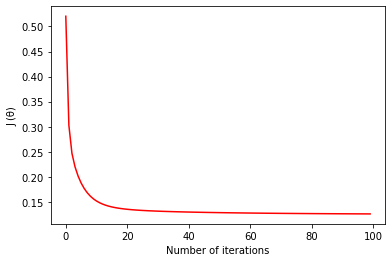

In [15]:
iteration=100 #Number of times need to iterate
learning_rate=0.1 #Learning Rate


theta=model(x_train,y_train,learning_rate=learning_rate,iteration=iteration) #Calculate theta
print(theta)

# f. Predict the values using test data.

In [75]:
#Predecting the values using test data 
y_pred=np.dot(x_test,theta)
print(y_pred.shape)
print(y_test.shape)
for i in range(y_pred.shape[0]):
    print("Prediction :",y_pred[i]," \t| Actual :",y_test[i])

(101, 1)
(101, 1)
Prediction : [0.32662164]  	| Actual : [0.67089105]
Prediction : [-0.35615388]  	| Actual : [-0.39468865]
Prediction : [-0.12439577]  	| Actual : [-0.09023731]
Prediction : [-0.34758626]  	| Actual : [-0.47080149]
Prediction : [-0.17800456]  	| Actual : [0.06198836]
Prediction : [-0.58405913]  	| Actual : [-0.54691433]
Prediction : [-0.46954394]  	| Actual : [-0.47080149]
Prediction : [-1.40588024]  	| Actual : [-1.0144646]
Prediction : [-0.93678132]  	| Actual : [-0.98184482]
Prediction : [0.69726671]  	| Actual : [0.44255254]
Prediction : [-0.08424751]  	| Actual : [-0.35119561]
Prediction : [0.89353374]  	| Actual : [1.39939962]
Prediction : [0.06073241]  	| Actual : [0.26858034]
Prediction : [0.23349136]  	| Actual : [0.02936857]
Prediction : [0.4047771]  	| Actual : [0.17072098]
Prediction : [0.20418919]  	| Actual : [-0.1228571]
Prediction : [-0.0695386]  	| Actual : [-0.14460362]
Prediction : [-0.01962608]  	| Actual : [-0.00325121]
Prediction : [0.52937418]  	

# g. Calculate the error / accuracy of the model using root mean squared error

In [76]:
# Root mean squared error = 1/(2m) x √((Y-Y_pred)^2/N) 

error=math.sqrt(np.mean((y_pred-y_test)**2))

print("\nMAE error is ",error)


MAE error is  0.5641183381306787
